In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화↑

sns.set(style='ticks') # 그래프 스타일 변경

In [ ]:
subdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021CCP/subwayyy.csv')
subdata = subdata.reset_index()
subdata.columns = ['사용일자','노선명', '역명','승차총승객수','하차총승객수','e','f']
subdata = subdata.drop(['e','f'],axis=1)

subdata

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210501,9호선,노량진,19486,19311
1,20210501,5호선,올림픽공원(한국체대),2406,1953
2,20210501,5호선,방이,4454,4330
3,20210501,5호선,오금,2047,1889
4,20210501,5호선,개롱,3667,3832
...,...,...,...,...,...
18627,20210531,안산선,반월,4361,4161
18628,20210531,안산선,대야미,4898,4540
18629,20210531,안산선,산본,15489,16517
18630,20210531,수인선,인천,945,1500


In [ ]:
is_usable1 = subdata['노선명'] == '1호선'
is_usable2 = subdata['노선명'] == '2호선'
is_usable3 = subdata['노선명'] == '3호선'
is_usable4 = subdata['노선명'] == '4호선'
is_usable5 = subdata['노선명'] == '5호선'
is_usable6 = subdata['노선명'] == '6호선'
is_usable7 = subdata['노선명'] == '7호선'
is_usable8 = subdata['노선명'] == '8호선'
is_usable9 = subdata['노선명'] == '9호선'
is_usable = is_usable1|is_usable2|is_usable3|is_usable4|is_usable5|is_usable6|is_usable7|is_usable8|is_usable9

subdata = subdata[is_usable]
subdata = subdata.sort_values(by=['역명','사용일자'])
subdata

,사용일자,노선명,역명,승차총승객수,하차총승객수
87,20210501,3호선,가락시장,5485,5181
272,20210501,8호선,가락시장,5236,5152
696,20210502,3호선,가락시장,3574,3879
876,20210502,8호선,가락시장,2999,3819
1527,20210503,8호선,가락시장,7913,8592
...,...,...,...,...,...
15953,20210527,9호선,흑석(중앙대입구),7799,8175
16523,20210528,9호선,흑석(중앙대입구),7827,8017
17129,20210529,9호선,흑석(중앙대입구),5216,5326
17733,20210530,9호선,흑석(중앙대입구),3795,4032


In [ ]:
stations = subdata['역명'].values
stations = set(stations)
stations = list(stations)
stations.sort()
len(stations)

268

In [ ]:
# 요일별 분류
#예외처리 : 5/5(수) 5/8(토) 5/15(토) 5/19(수)
data_MON = subdata[subdata['사용일자']%7==5]
data_TUE = subdata[subdata['사용일자']%7==6]
data_WED = subdata[subdata['사용일자']%7==0]
#data_WED_h = data_WED[data_WED['사용일자']!=20210505]
#data_WED_h = data_WED_h[data_WED_h['사용일자']!=20210519]
data_THU = subdata[subdata['사용일자']%7==1]
data_FRI = subdata[subdata['사용일자']%7==2]
data_SAT = subdata[subdata['사용일자']%7==3]
#data_SAT_h = data_SAT[data_SAT['사용일자']!=20210508]
#data_SAT_h = data_SAT_h[data_SAT_h['사용일자']!=20210515]
data_SUN = subdata[subdata['사용일자']%7==4]

In [ ]:
# 호선별 분류
data_1 = subdata[subdata['노선명']=='1호선']
data_2 = subdata[subdata['노선명']=='2호선']
data_3 = subdata[subdata['노선명']=='3호선']
data_4 = subdata[subdata['노선명']=='4호선']
data_5 = subdata[subdata['노선명']=='5호선']
data_6 = subdata[subdata['노선명']=='6호선']
data_7 = subdata[subdata['노선명']=='7호선']
data_8 = subdata[subdata['노선명']=='8호선']
data_9 = subdata[subdata['노선명']=='9호선']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


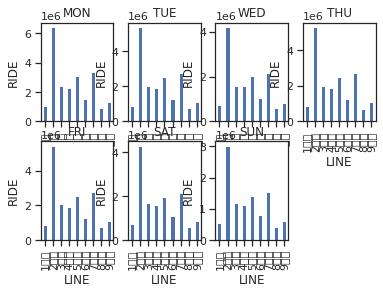

In [ ]:
plt.subplot(241) # 세로 2개 가로 4개의 1번째
graph_data = data_MON.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('MON')
plt.subplot(242)
graph_data = data_TUE.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('TUE')
plt.subplot(243)
graph_data = data_WED.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('WED')
plt.subplot(244)
graph_data = data_THU.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('THU')
plt.subplot(245)
graph_data = data_FRI.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('FRI')
plt.subplot(246)
graph_data = data_SAT.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('SAT')
plt.subplot(247)
graph_data = data_SUN.groupby('노선명').sum()
graph_data['승차총승객수'].plot(kind='bar')
plt.xlabel('LINE')
plt.ylabel('RIDE')
plt.title('SUN')

plt.show()

In [ ]:
#

In [ ]:
# 역별 요일 평균값
from pandas import Series, DataFrame

s_m_res_MON = {}
s_m_res_TUE = {}
s_m_res_WED = {}
s_m_res_THU = {}
s_m_res_FRI = {}
s_m_res_SAT = {}
s_m_res_SUN = {}

for i in range(268):
  # MON
  is_station = traindata_MON['역명'] == stations[i]
  train_mean = traindata_MON[is_station]
  s_m_res_MON[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # TUE
  is_station = traindata_TUE['역명'] == stations[i]
  train_mean = traindata_TUE[is_station]
  s_m_res_TUE[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # WED
  is_station = traindata_WED['역명'] == stations[i]
  train_mean = traindata_WED[is_station]
  s_m_res_WED[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # THU
  is_station = traindata_THU['역명'] == stations[i]
  train_mean = traindata_THU[is_station]
  s_m_res_THU[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # FRI
  is_station = traindata_FRI['역명'] == stations[i]
  train_mean = traindata_FRI[is_station]
  s_m_res_FRI[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # SAT
  is_station = traindata_SAT['역명'] == stations[i]
  train_mean = traindata_SAT[is_station]
  s_m_res_SAT[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]
  # SUN
  is_station = traindata_SUN['역명'] == stations[i]
  train_mean = traindata_SUN[is_station]
  s_m_res_SUN[stations[i]] = [train_mean.mean()[1], train_mean.mean()[2]]

mean_res_MON = DataFrame(s_m_res_MON)
mean_res_TUE = DataFrame(s_m_res_TUE)
mean_res_WED = DataFrame(s_m_res_WED)
mean_res_THU = DataFrame(s_m_res_THU)
mean_res_FRI = DataFrame(s_m_res_FRI)
mean_res_SAT = DataFrame(s_m_res_SAT)
mean_res_SUN = DataFrame(s_m_res_SUN)

mean_res_MON

,가락시장,가산디지털단지,가양,강남,강남구청,강동,강동구청,강변(동서울터미널),강일,개롱,개화,개화산,거여,건대입구,경복궁(정부서울청사),경찰병원,고덕,고려대(종암),고속터미널,공덕,공릉(서울과학기술대),공항시장,광나루(장신대),광명사거리,광화문(세종문화회관),광흥창(서강),교대(법원.검찰청),구로디지털단지,구반포,구산,구의(광진구청),구파발,국회의사당,군자(능동),굴포천,굽은다리(강동구민회관앞),금호,길동,길음,김포공항,...,종로5가,종합운동장,중계,중곡,중화,증미,증산(명지대앞),지축,창동,창신,천왕,천호(풍납토성),철산,청구,청담,청량리(서울시립대입구),총신대입구(이수),춘의,충무로,충정로(경기대입구),태릉입구,하계,하남검단산,하남시청(덕풍·신장),하남풍산,학동,학여울,한강진,한성대입구(삼선교),한양대,합정,행당,혜화,홍대입구,홍제,화곡,화랑대(서울여대입구),회현(남대문시장),효창공원앞,흑석(중앙대입구)
0,16517.50,48476.25,19969.00,81613.0,15876.25,18456.25,10517.00,29604.5,3043.75,6488.25,2637.25,5412.50,8405.25,43084.75,17939.5,7638.50,9319.75,7861.75,62268.25,33061.50,11760.75,2844.25,12673.0,22248.75,28920.75,8893.75,47344.25,61413.75,2709.00,7639.75,23028.75,20379.50,15411.00,25398.75,8595.75,9374.00,8101.25,8143.0,20067.25,14438.25,...,21778.5,7059.5,14381.50,9983.75,10966.5,7392.75,9933.50,4080.5,25465.00,3618.0,11700.0,31238.00,21659.25,7776.75,19447.5,19593.25,18402.50,9622.25,25816.0,15067.00,13930.0,17272.5,4534.25,5081.00,3868.75,24537.50,1695.75,6382.00,13456.75,8196.00,40110.25,8181.75,28304.00,45717.50,17299.0,28196.25,11437.25,22910.5,6920.25,7544.25
1,17179.75,48838.00,19634.25,80331.5,17420.75,17675.00,10973.25,28680.5,3204.50,6716.25,1772.50,5130.75,8038.50,45663.00,17699.0,7696.25,9246.75,7549.00,59887.50,33252.75,11812.00,3036.25,11617.5,21674.00,30397.75,8630.50,46991.00,61851.75,2791.75,5818.50,22903.00,19172.25,15911.75,23844.75,9185.50,8936.75,7691.50,8417.0,19698.00,17022.50,...,21776.0,7816.0,13203.25,9196.00,10791.0,7476.50,9757.75,3927.0,26992.75,3013.0,11148.0,33397.25,22015.25,7669.25,21544.5,19481.00,19970.75,9582.75,26813.5,15669.25,14476.5,16380.5,4396.75,5118.25,3854.75,26099.25,1725.75,7358.25,13195.50,8997.25,40937.50,7336.75,28439.75,47228.25,16564.5,26491.25,8933.25,24376.0,6308.25,7961.00


In [ ]:
# transpose
mean_res_MON = mean_res_MON.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_MON = mean_res_MON.transpose()
mean_res_TUE = mean_res_TUE.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_TUE = mean_res_TUE.transpose()
mean_res_WED = mean_res_WED.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_WED = mean_res_WED.transpose()
mean_res_THU = mean_res_THU.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_THU = mean_res_THU.transpose()
mean_res_FRI = mean_res_FRI.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_FRI = mean_res_FRI.transpose()
mean_res_SAT = mean_res_SAT.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_SAT = mean_res_SAT.transpose()
mean_res_SUN = mean_res_SUN.rename(index={0:'승차총승객수', 1:'하차총승객수'})
mean_res_SUN = mean_res_SUN.transpose()

mean_res_MON

,승차총승객수,하차총승객수
가락시장,16517.50,17179.75
가산디지털단지,48476.25,48838.00
가양,19969.00,19634.25
강남,81613.00,80331.50
강남구청,15876.25,17420.75
...,...,...
화곡,28196.25,26491.25
화랑대(서울여대입구),11437.25,8933.25
회현(남대문시장),22910.50,24376.00
효창공원앞,6920.25,6308.25


In [ ]:
# 5/31 월요일 기준
# (월요일평균 하차 - 승차) vs (테스트날 하차 - 승차)
# 테스트날이 월요일평균의 A~B 사이면 보통 / A 미만이면 여유 / B 초과면 혼잡
# 계산 위해 리스트로 변환
mean_res_MON_1 = mean_res_MON['승차총승객수'].values.tolist()
mean_res_MON_2 = mean_res_MON['하차총승객수'].values.tolist()
testdata_1 = testdata['승차총승객수'].values.tolist()
testdata_2 = testdata['하차총승객수'].values.tolist()

In [ ]:
print(len(mean_res_MON_1))
print(len(mean_res_MON_2))
print(len(testdata_1))
print(len(testdata_2))

268
268
268
268


In [ ]:
print(max(mean_res_MON_1))
print(max(mean_res_MON_2))
print(max(testdata_1))
print(max(testdata_2))

81613.0
80331.5
77677
76332


In [ ]:
res = []
# 현재는 전체 역의 월요일 평균값의 합을 사용 -> 수정 필요 (ex. n호선 평균값)
all_sum = sum(mean_res_MON_1) + sum(mean_res_MON_2)
for i in range(268):
  avg_delta = mean_res_MON_2[i] + mean_res_MON_1[i]
  test_delta = testdata_2[i] + testdata_1[i]
  all_ratio = avg_delta / all_sum
  lower_bnd = avg_delta * all_ratio * 300 * 0.7
  upper_bnd = avg_delta * all_ratio * 300 * 1.3
  # 0.7~1.3 보통 / 0.7 미만 여유 / 1.3 초과 혼잡 -> 수정 필요 (더 나은 기준값 필요)
  if test_delta >= lower_bnd and test_delta <= upper_bnd:
    res.append('보통')
  elif test_delta > upper_bnd:
    res.append('혼잡')
  elif test_delta < lower_bnd:
    res.append('여유')

print(res)

['보통', '여유', '보통', '여유', '보통', '보통', '혼잡', '여유', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '여유', '보통', '혼잡', '혼잡', '혼잡', '여유', '여유', '보통', '혼잡', '보통', '여유', '여유', '혼잡', '여유', '여유', '혼잡', '혼잡', '여유', '보통', '보통', '여유', '혼잡', '혼잡', '혼잡', '혼잡', '보통', '보통', '여유', '혼잡', '여유', '보통', '여유', '혼잡', '혼잡', '보통', '보통', '혼잡', '여유', '여유', '보통', '혼잡', '여유', '혼잡', '보통', '보통', '여유', '여유', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '여유', '여유', '혼잡', '보통', '혼잡', '혼잡', '혼잡', '보통', '여유', '혼잡', '혼잡', '혼잡', '보통', '혼잡', '혼잡', '보통', '보통', '보통', '보통', '혼잡', '보통', '보통', '혼잡', '혼잡', '보통', '혼잡', '혼잡', '여유', '여유', '보통', '보통', '여유', '혼잡', '보통', '보통', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '혼잡', '여유', '혼잡', '보통', '혼잡', '보통', '보통', '보통', '여유', '혼잡', '혼잡', '혼잡', '혼잡', '여유', '보통', '혼잡', '보통', '보통', '혼잡', '보통', '혼잡', '보통', '보통', '혼잡', '보통', '여유', '여유', '보통', '보통', '혼잡', '여유', '혼잡', '여유', '보통', '혼잡', '혼잡', '보통', '보통', '여유', '혼잡', '보통', '보통', '여유', '혼잡', '혼잡', '혼잡', '여유', '혼잡', '여유', '여유', '보통', '여유', '여유', '혼잡', '혼잡', '혼잡', '여유', '보통

In [ ]:
a = [] # 여유
b = [] # 보통
c = [] # 혼잡

for i in range(268):
  if res[i] == '여유':
    a.append(i)
  elif res[i] == '보통':
    b.append(i)
  elif res[i] == '혼잡':
    c.append(i)

print(len(a))
print(len(b))
print(len(c))

66
83
119


In [ ]:
recommend_name = []
for i in a:
  recommend_name.append(stations[i])

print(recommend_name)

['가산디지털단지', '강남', '강변(동서울터미널)', '건대입구', '고속터미널', '공덕', '광명사거리', '광화문(세종문화회관)', '교대(법원.검찰청)', '구로디지털단지', '구의(광진구청)', '군자(능동)', '까치산', '낙성대(강감찬)', '남부터미널(예술의전당)', '노량진', '노원', '논현', '당산', '대림(구로구청)', '동대문', '동대문역사문화공원(DDP)', '뚝섬', '문래', '문정', '미아사거리', '봉천', '사당', '삼성(무역센터)', '서울대입구(관악구청)', '서울역', '선릉', '성수', '수유(강북구청)', '시청', '신논현', '신당', '신대방', '신도림', '신림', '신사', '신촌', '쌍문', '압구정', '양재(서초구청)', '여의도', '역삼', '연신내', '영등포구청', '오목교(목동운동장앞)', '을지로3가', '을지로입구', '잠실(송파구청)', '종각', '종로3가', '종로5가', '창동', '천호(풍납토성)', '철산', '충무로', '학동', '합정', '혜화', '홍대입구', '화곡', '회현(남대문시장)']


In [ ]:
# 결과 비교용
print(stations)

['가락시장', '가산디지털단지', '가양', '강남', '강남구청', '강동', '강동구청', '강변(동서울터미널)', '강일', '개롱', '개화', '개화산', '거여', '건대입구', '경복궁(정부서울청사)', '경찰병원', '고덕', '고려대(종암)', '고속터미널', '공덕', '공릉(서울과학기술대)', '공항시장', '광나루(장신대)', '광명사거리', '광화문(세종문화회관)', '광흥창(서강)', '교대(법원.검찰청)', '구로디지털단지', '구반포', '구산', '구의(광진구청)', '구파발', '국회의사당', '군자(능동)', '굴포천', '굽은다리(강동구민회관앞)', '금호', '길동', '길음', '김포공항', '까치산', '까치울', '낙성대(강감찬)', '남구로', '남부터미널(예술의전당)', '남성', '남태령', '남한산성입구(성남법원.검찰청)', '내방', '노들', '노량진', '노원', '녹번', '녹사평(용산구청)', '논현', '단대오거리', '답십리', '당고개', '당산', '대림(구로구청)', '대청', '대치', '대흥(서강대앞)', '도곡', '도림천', '도봉산', '독립문', '독바위', '돌곶이', '동대문', '동대문역사문화공원(DDP)', '동대입구', '동묘앞', '동작(현충원)', '둔촌동', '등촌', '디지털미디어시티', '뚝섬', '뚝섬유원지', '마곡', '마곡나루(서울식물원)', '마들', '마장', '마천', '마포', '마포구청', '망원', '매봉', '먹골', '면목', '명동', '명일', '모란', '목동', '몽촌토성(평화의문)', '무악재', '문래', '문정', '미사', '미아(서울사이버대학)', '미아사거리', '반포', '발산', '방배', '방이', '방화', '버티고개', '보라매', '보문', '복정', '봉천', '봉화산(서울의료원)', '부천시청', '부천종합운동장', '부평구청', '불광', '사가정', '사당', '사평', '산성', '삼각지', '삼산체육관'

In [ ]:
# 평균 기준이 여러 개 필요
# 호선별 / 전체 / 요일별 / 시간대별